## NumPy (https://docs.scipy.org/doc/numpy/release.html)

In [177]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## Vector

In [178]:
# declare
x = np.array([1,2,3])
y = np.array([4,5,6])
print("DECLARE")
print("x: ",x)
print("y: ",y)
print()

# arithmetic (Fortranに似てる)
print("ARITHMETIC")
print("+: ",x+y)
print("-: ",x-y)
print("*: ",x*y)
print("/: ",x/y)
print("**: ",x**y)
print("+1: ",x+1)
print()

# functions (Fortranに似てる)
print("FUNCTIONS")
print("sin: ",np.sin(x))
print("cos: ",np.cos(x))
print("exp: ",np.exp(x))
print("log: ",np.log(x))
print("etc...")

DECLARE
x:  [1 2 3]
y:  [4 5 6]

ARITHMETIC
+:  [5 7 9]
-:  [-3 -3 -3]
*:  [ 4 10 18]
/:  [0.25 0.4  0.5 ]
**:  [  1  32 729]
+1:  [2 3 4]

FUNCTIONS
sin:  [0.84147098 0.90929743 0.14112001]
cos:  [ 0.54030231 -0.41614684 -0.9899925 ]
exp:  [ 2.71828183  7.3890561  20.08553692]
log:  [0.         0.69314718 1.09861229]
etc...


In [179]:
# dot product
print("DOT PRODUCT")
print("np.dot(x,y): ",np.dot(x,y))
print("x.dot(y): ",x.dot(y))
print()

# cross product
print("CROSS PRODUCT")
c = np.cross(x,y)
print("np.cross(x,y): ",c)
print()

# row to column
print("ROW TO COLUMN")
print("c[:,np.newaxis]: ",c[:,np.newaxis])

DOT PRODUCT
np.dot(x,y):  32
x.dot(y):  32

CROSS PRODUCT
np.cross(x,y):  [-3  6 -3]

ROW TO COLUMN
c[:,np.newaxis]:  [[-3]
 [ 6]
 [-3]]


In [180]:
# shallow copy (Fortranと違う)
x = np.array([1,2,3])
y = np.array([4,5,6])
print("SHALLOW COPY")
print("original")
print("x: ",x)
print("y: ",y)
print()
x = y
print("x = y")
print("x: ",x)
print("y: ",y)
print()
y[1] = -1
print("y[1] = -1")
print("x: ",x)
print("y: ",y)
print()

# deep copy
x = np.array([1,2,3])
y = np.array([4,5,6])
print("DEEP COPY")
print("original")
print("x: ",x)
print("y: ",y)
print()
x = np.copy(y)
print("x = np.copy(y)")
print("x: ",x)
print("y: ",y)
print()
y[1] = -1
print("y[1] = -1")
print("x: ",x)
print("y: ",y)
print()

# ただし、配列の形状がいびつな場合はcopyがうまくいかず、参照渡しとなる。
# 配列の形状がいびつな場合でdeep copyをしたい場合は、
# import copyして、x = copy.deepcopy(y)とする。

SHALLOW COPY
original
x:  [1 2 3]
y:  [4 5 6]

x = y
x:  [4 5 6]
y:  [4 5 6]

y[1] = -1
x:  [ 4 -1  6]
y:  [ 4 -1  6]

DEEP COPY
original
x:  [1 2 3]
y:  [4 5 6]

x = np.copy(y)
x:  [4 5 6]
y:  [4 5 6]

y[1] = -1
x:  [4 5 6]
y:  [ 4 -1  6]



## Matrix

In [181]:
# declare
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[4,5,6],[7,8,9]])
print("DECLARE")
print("a: ",a)
print("b: ",b)
print()

# arithmetic (Fortranに似てる)
print("ARITHMETIC")
print("+: ",a+b)
print("-: ",a-b)
print("*: ",a*b)
print("/: ",a/b)
print("**: ",a**b)
print("+1: ",a+1)
print()

# functions (Fortranに似てる)
print("FUNCTIONS")
print("sin: ",np.sin(a))
print("cos: ",np.cos(a))
print("exp: ",np.exp(a))
print("log: ",np.log(a))
print("etc...")

DECLARE
a:  [[1 2 3]
 [4 5 6]]
b:  [[4 5 6]
 [7 8 9]]

ARITHMETIC
+:  [[ 5  7  9]
 [11 13 15]]
-:  [[-3 -3 -3]
 [-3 -3 -3]]
*:  [[ 4 10 18]
 [28 40 54]]
/:  [[0.25       0.4        0.5       ]
 [0.57142857 0.625      0.66666667]]
**:  [[       1       32      729]
 [   16384   390625 10077696]]
+1:  [[2 3 4]
 [5 6 7]]

FUNCTIONS
sin:  [[ 0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155 ]]
cos:  [[ 0.54030231 -0.41614684 -0.9899925 ]
 [-0.65364362  0.28366219  0.96017029]]
exp:  [[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]
log:  [[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]]
etc...


In [182]:
# reshape
c = np.arange(24)
print("c: ",c)
print("c.reshape([3,8]): ",c.reshape([3,8]))
print("c.reshape(3,8): ",c.reshape(3,8))
print("np.reshape(c,[3,8]): ",np.reshape(c,[3,8]))
# np.reshape(c,3,8)はダメ
print("c.reshape(3,-1): ",c.reshape(3,-1))
# -1を指定すると自動で形状を計算してくれる

# 引数にorder='F'やorder='C'を入れると、
# 配列の順序をFortran式かC言語式として指定できる。
# defaultはorder='C'。

c:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
c.reshape([3,8]):  [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
c.reshape(3,8):  [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
np.reshape(c,[3,8]):  [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
c.reshape(3,-1):  [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]


In [183]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[4,5,6],[7,8,9]])
print("a: ",a)
print("b: ",b)
print()

# transpose
print("TRANSPOSE")
print("b.T: ",b.T)
print()

# matrix multiply
print("MATRIX MULTIPLY")
m = np.dot(a,b.T)
print("np.dot(a,b.T): ",m)
m = a.dot(b.T)
print("a.dot(b.T): ",m)
print()

# shape
print("SHAPE")
print("np.shape(a): ",np.shape(a))
print("np.shape(b.T): ",np.shape(b.T))
print("np.shape(m): ",np.shape(m))
print()

# trace
print("TRACE")
print("np.trace(m): ",np.trace(m))
print()

# determinant
print("DETERMINANT")
print("np.linalg.det(m): ",np.linalg.det(m))
print()

# rank
print("RANK")
print("np.linalg.matrix_rank(m): ",np.linalg.matrix_rank(m))
print()

# norm
print("NORM")
print("np.linalg.norm(m): ",np.linalg.norm(m))
print()

# inverse
print("INVERSE")
print("np.linalg.inv(m): ",np.linalg.inv(m))
print("np.matrix(m).I: ",np.matrix(m).I)
print("np.linalg.solve(m,np.identity(np.shape(m)[0])): ",np.linalg.solve(m,np.identity(np.shape(m)[0])))
print()

# eigen value, eigen vector
print("EIGEN VALUE, EIGEN VALUE")
w,v = np.linalg.eig(m)
print("eigen value0: ",w[0])
print("eigen vector0: ",v[:,0])
print("eigen value1: ",w[1])
print("eigen vector1: ",v[:,1])

a:  [[1 2 3]
 [4 5 6]]
b:  [[4 5 6]
 [7 8 9]]

TRANSPOSE
b.T:  [[4 7]
 [5 8]
 [6 9]]

MATRIX MULTIPLY
np.dot(a,b.T):  [[ 32  50]
 [ 77 122]]
a.dot(b.T):  [[ 32  50]
 [ 77 122]]

SHAPE
np.shape(a):  (2, 3)
np.shape(b.T):  (3, 2)
np.shape(m):  (2, 2)

TRACE
np.trace(m):  154

DETERMINANT
np.linalg.det(m):  54.00000000000022

RANK
np.linalg.matrix_rank(m):  2

NORM
np.linalg.norm(m):  156.00320509528

INVERSE
np.linalg.inv(m):  [[ 2.25925926 -0.92592593]
 [-1.42592593  0.59259259]]
np.matrix(m).I:  [[ 2.25925926 -0.92592593]
 [-1.42592593  0.59259259]]
np.linalg.solve(m,np.identity(np.shape(m)[0])):  [[ 2.25925926 -0.92592593]
 [-1.42592593  0.59259259]]

EIGEN VALUE, EIGEN VALUE
eigen value0:  0.35145141622052734
eigen vector0:  [-0.84495745  0.53483354]
eigen value1:  153.64854858377947
eigen vector1:  [-0.38016088 -0.92492038]


## Examples

x:  [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
y:  [ 8.93664733  9.7703464  20.86171436 27.5363808  35.38728697 43.53245078
 50.83936975 51.64264053 57.67611425 65.93679631]

a (true):  5.886908837657112
b (true):  7.289904266262345

a (manual1):  5.892548057447013
b (manual1):  7.777430559477246

a (manual2):  5.892548057447019
b (manual2):  7.749234460527717

a (polyfit):  5.892548057447017
b (polyfit):  7.749234460527714



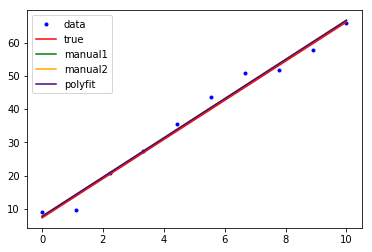

a (leastsq):  5.892548056405194
b (leastsq):  7.7492344763830845

a (curve_fit):  5.892548053068149
b (curve_fit):  7.749234482422058



In [184]:
n = 10
a = n*np.random.rand()
b = n*np.random.rand()
x = np.linspace(0,n,n)
y = a*x + b + 0.5*n*(np.random.rand(n) - np.random.rand(n))
print("x: ",x)
print("y: ",y)
print()
plt.plot(x,y,".",c="b",label="data")

# answer
print("a (true): ",a)
print("b (true): ",b)
print()
plt.plot(x,a*x+b,"-",c="r",label="true")

# fitting (manual1)
mx = np.average(x)
my = np.mean(y)
mx2 = np.dot(x,x)/n
mxy = np.sum(x*y)/n
den = mx2 - mx*mx
p = (mxy-mx*my)/den
q = my-a*mx
print("a (manual1): ",p)
print("b (manual1): ",q)
print()
plt.plot(x,p*x+q,"-",c="g",label="manual1")

# fitting (manual2)
m = np.array([[mx2,mx],[mx,1]])
s = np.dot(np.linalg.inv(m),np.array([mxy,my]))
p = s[0]
q = s[1]
print("a (manual2): ",p)
print("b (manual2): ",q)
print()
plt.plot(x,p*x+q,"-",c="orange",label="manual2")

# fitting (polyfit)
p,q = np.polyfit(x,y,1)
print("a (polyfit): ",p)
print("b (polyfit): ",q)
print()
plt.plot(x,p*x+q,"-",c="indigo",label="polyfit")

plt.legend(loc="best")
plt.show()

### SciPy ###

def f(p,x,y):
    return y - (p[0]*x+p[1])

def g(x,a,b):
    return a*x + b

# fitting (optimize.leastsq)
s,t = optimize.leastsq(f,[n/2,n/2],args=(x,y))
p = s[0]
q = s[1]
print("a (leastsq): ",p)
print("b (leastsq): ",q)
print()

# fitting (optimize.curve_fit)
s,t = optimize.curve_fit(g,x,y)
p = s[0]
q = s[1]
print("a (curve_fit): ",p)
print("b (curve_fit): ",q)
print()

## FFT

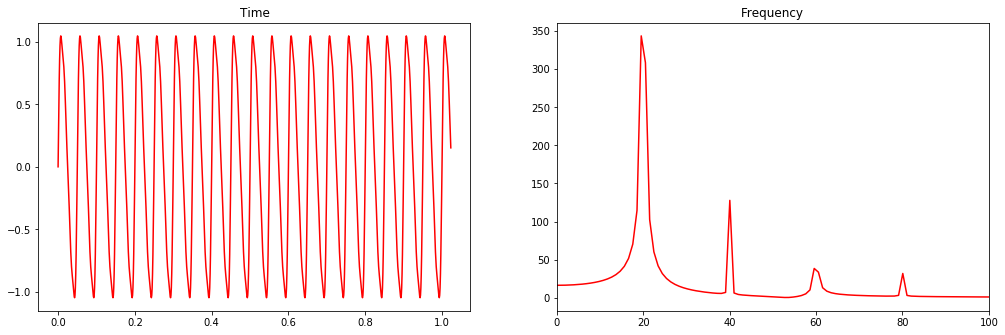

[0.         0.25851804 0.49795959 0.70217434 0.8602792  0.96795891
 1.0274997  1.04660546 1.03630353 1.0084302 ]
[6.65163114e-17 2.58518038e-01 4.97959591e-01 7.02174339e-01
 8.60279205e-01 9.67958906e-01 1.02749970e+00 1.04660546e+00
 1.03630353e+00 1.00843020e+00]


In [233]:
n = 1024
h = int(n/2)
dt = 0.001
t = np.arange(0,n*dt,dt)
u = np.zeros(n)
for i in range(1,5):
    k = 20*i
    u += np.sin(2*np.pi*k*t)/np.power(i,2)
a = np.fft.fft(u)
a = np.abs(a)
f = np.fft.fftfreq(n)
f /= dt

plt.axes([0,0,1,1])
plt.plot(t,u,"-",c="r")
plt.title("Time")
plt.axes([1.2,0,1,1])
plt.plot(f[:h],a[:h],"-",c="r")
plt.xlim(0,100)
plt.title("Frequency")
plt.show()

v = np.fft.ifft(np.fft.fft(u))
print(u[:10])
print(np.abs(v[:10]))